In [ ]:
# Function to pre-process images
 
transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),                
 transforms.ToTensor(),                     
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225])
])
 
transform2 = transforms.Compose([            
 transforms.Resize(106),                    
 transforms.CenterCrop(84),                
 transforms.ToTensor(),                     
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225])
])

In [ ]:
# To extract features and labels 

dataset_root = "A3_dataset"
features = []
labels = []
classes = os.listdir(dataset_root)
count = 0
for cls in classes:
  print(count)
  files = os.listdir(dataset_root + "/" + cls)
  for f in files:
    img = Image.open(dataset_root + "/" + cls + "/"  + f)
    img_t = transform2(img)
    batch_t = torch.unsqueeze(img_t, 0)
    features.append(batch_t.numpy())
    labels.append(count)
  count += 1
features = np.array(features)
labels = np.array(labels)
print(features.shape,labels.shape)
np.save("features2.npy",features)
np.save("labels2.npy",labels)

0
1
2
3
4
5
6
(418, 1, 3, 84, 84) (418,)


In [ ]:
#==========================================================================================================================================================

In [ ]:
from torchvision import models
import torch
from torchvision import transforms
import os
from PIL import Image
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
 
np.random.seed(1)
 
%cd drive/My\ Drive/DL/A3

[Errno 2] No such file or directory: 'drive/My Drive/DL/A3'
/content/drive/My Drive/DL/A3


In [ ]:
googlenet = models.googlenet(pretrained=True)
googlenet.fc = nn.Sequential(nn.Linear(1024,100),nn.ReLU(),nn.Linear(100,7))
print(googlenet)

In [ ]:
vgg16 = models.vgg16(pretrained=True)
# print(vgg16)

In [ ]:
new_classifier = nn.Sequential(*list(vgg16.classifier.children())[:-2])
vgg16.classifier = new_classifier
print(vgg16)

In [ ]:
# Deep-CNN features
features = np.load("features.npy")
extracted_features = []
if type(features) is np.ndarray:
  features = torch.from_numpy(features)
count = 0
for f in features:
  print(count)
  outp = vgg16(f)
  extracted_features.append(outp.view(outp.size(0),-1).detach().numpy().tolist())
  count += 1
extracted_features = np.array(extracted_features)
print(extracted_features.shape)
np.save("extracted_features_avgpool.npy",extracted_features)

In [ ]:
# Deep-CNN features googlenet
features = np.load("features.npy")
extracted_features = []
if type(features) is np.ndarray:
  features = torch.from_numpy(features)
count = 0
for f in features:
  print(count)
  outp = torch.squeeze(googlenet(f),0)
  # outp = torch.squeeze(outp,2)
  # outp = torch.squeeze(outp,2)
  # extracted_features.append(outp.view(outp.size(0),-1).detach().numpy().tolist())
  extracted_features.append(outp.detach().numpy().tolist())
  count += 1
extracted_features = np.array(extracted_features)
print(extracted_features.shape)
np.save("extracted_features_googlenet.npy",extracted_features)

In [ ]:
# Dataset preparation for Task 1 : using pretrained models 
extracted_features = np.squeeze(np.load("extracted_features_fc2_with_relu.npy"),(1))
deep_f = extracted_features
labels = np.load("labels.npy")
train_set = []
test_set = []
validation_set = []
new = 0
count = 0
for l in labels:
  if l == 1 and new==0:
    new = 57 
    count = 0
  if (count % 10) < 7:
    train_set.append(np.concatenate((deep_f[new + count,:].reshape(deep_f.shape[1],1),np.array([[l]]).reshape((1,1))),axis=0))
  if (count % 10) == 7:
    validation_set.append(np.concatenate((deep_f[new + count,:].reshape(deep_f.shape[1],1),np.array([[l]]).reshape((1,1))),axis=0))
  if (count % 10) == 8 or (count % 10) == 9:
    test_set.append(np.concatenate((deep_f[new + count,:].reshape(deep_f.shape[1],1),np.array([[l]]).reshape((1,1))),axis=0))
  count += 1
train_set = np.squeeze(np.array(train_set),axis=2)
test_set = np.squeeze(np.array(test_set),axis=2)
validation_set = np.squeeze(np.array(validation_set),axis=2)
np.random.shuffle(train_set)
np.random.shuffle(validation_set)
np.random.shuffle(test_set) 
print(train_set.shape,validation_set.shape,test_set.shape)

(294, 4097) (42, 4097) (82, 4097)


In [ ]:
# Dataset preparation for Task 2 : CNN from scratch
features = np.load("features.npy")
labels = np.load("labels.npy")
deep_f = features
 
train_set_f = []
test_set_f = []
validation_set_f = []
train_set_l = []
test_set_l = []
validation_set_l = []
 
count = 0
for l in labels:
  if (count % 10) < 7:
    train_set_f.append(features[count,:,:,:])
    train_set_l.append(l)
  if (count % 10) == 7:
    validation_set_f.append(features[count,:,:,:])
    validation_set_l.append(l)
  if (count % 10) == 8 or (count % 10) == 9:
    test_set_f.append(features[count,:,:,:])
    test_set_l.append(l)
  count += 1
 
train_set_f = np.squeeze(np.array(train_set_f),axis=1)
validation_set_f = np.squeeze(np.array(validation_set_f),axis=1)
test_set_f = np.squeeze(np.array(test_set_f),axis=1)
train_set_l = np.array(train_set_l)
validation_set_l = np.array(validation_set_l)
test_set_l = np.array(test_set_l)
 
rng_state = np.random.get_state()
np.random.shuffle(train_set_f)
np.random.set_state(rng_state)
np.random.shuffle(train_set_l)
 
rng_state = np.random.get_state()
np.random.shuffle(validation_set_f)
np.random.set_state(rng_state)
np.random.shuffle(validation_set_l)
 
rng_state = np.random.get_state()
np.random.shuffle(test_set_f)
np.random.set_state(rng_state)
np.random.shuffle(test_set_l)
 
print(train_set_f.shape,validation_set_f.shape,test_set_f.shape)

(294, 3, 224, 224) (42, 3, 224, 224) (82, 3, 224, 224)


In [ ]:
# To plot confusion matrix 

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
 
def calculate_confusion_matrix(pred, actual,f_name):
  num_classes = 7
  class_names = ["Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Total"]
  matrix = np.zeros((8,8))
  for i in range(len(actual)):
    matrix[actual[i],7] += 1
    matrix[actual[i],torch.argmax(pred[i])] += 1
    matrix[7,torch.argmax(pred[i])] += 1
    matrix[7,7] += 1
  df_cm = pd.DataFrame(matrix.astype(np.int))
  # plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True,fmt='g')
  plt.xlabel("Predicted Class")
  plt.ylabel("Actual Class")
  # plt.savefig(f_name+ ".png")
  plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Classifier using Deep CNN features
 
num_f = deep_f.shape[1]
 
if type(train_set) is np.ndarray:
  train_set_f = torch.from_numpy(train_set[:,0:num_f]).float()
  train_set_l = torch.from_numpy(train_set[:,num_f]).long()
  validation_set_f = torch.from_numpy(validation_set[:,0:num_f]).float()
  validation_set_l = torch.from_numpy(validation_set[:,num_f]).long()
  test_set_f = torch.from_numpy(test_set[:,0:num_f]).float()
  test_set_l = torch.from_numpy(test_set[:,num_f]).long()
 
input_size = deep_f.shape[1]
output_size = 7

no_epochs = 60
start_epoch = 0
train_from_saved_model = False
ckp_path = "deep_features_classifier/model_vgg16_with_relu_60.pth".format(start_epoch)
 
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.first = nn.Linear(input_size, 400)
        self.second = nn.Linear(400, output_size)
        self.relu = nn.ReLU() 
 
    def forward(self, x):
        x = self.first(x)
        x = self.relu(x)
        x = self.second(x)
        return x
 
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999))
 
def load_ckp(checkpoint_fpath, model, optimizer):
    checkpoint = torch.load(checkpoint_fpath)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    return model, optimizer, checkpoint['epoch']
 
print(torch.load(ckp_path))

if train_from_saved_model == True:
  model, optimizer, start_epoch = load_ckp(ckp_path, model, optimizer)


# Testing
def testing(data_f,data_l):
  output = model(data_f)
  correct_1 = 0
  for i in range(len(data_f)):
    if torch.argmax(output[i]) == data_l[i]:
      correct_1 += 1
    print(correct_1/len(data_l))
  
# Training
batch = 1
for e in range(no_epochs + 1):
    
    optimizer.zero_grad()
    outputs = model(train_set_f)
    loss = criterion(outputs,train_set_l)
    loss.backward()
    optimizer.step()
     
    print("Number of epochs : {} | Training Loss : {}".format(start_epoch + e,loss.item()/len(train_set_l)))
    # calculate_confusion_matrix(model(test_set_f),test_set_l,ckp_path)
    # testing(train_set_f,train_set_l)
    # testing(validation_set_f,validation_set_l)
    # testing(test_set_f,test_set_l)
    # print("")
      
#Saving model 
checkpoint = {
    'epoch': start_epoch + e,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict()
  }
 
torch.save(checkpoint, "deep_features_classifier/model_vgg16_with_relu_{}.pth".format(start_epoch + e))
calculate_confusion_matrix(model(test_set_f),test_set_l,ckp_path)

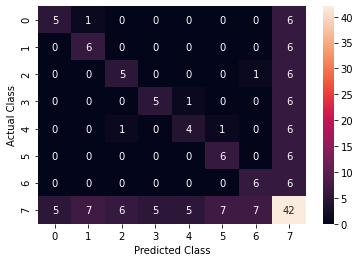

In [ ]:
calculate_confusion_matrix(model(validation_set_f),validation_set_l,ckp_path)

Number of epochs : 150 | Training Loss : 0.7328064441680908
0.9397959183673469
0.8809523809523809
0.9146341463414634


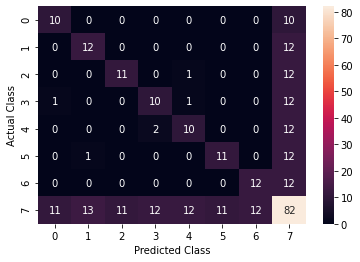

In [ ]:
# Freezing googlenet 
 
dev = torch.device("cuda:0")

if type(train_set_f) is np.ndarray:
  train_set_f = torch.from_numpy(train_set_f).float()
  train_set_l = torch.from_numpy(train_set_l).long()
  validation_set_f = torch.from_numpy(validation_set_f).float()
  validation_set_l = torch.from_numpy(validation_set_l).long()
  test_set_f = torch.from_numpy(test_set_f).float()
  test_set_l = torch.from_numpy(test_set_l).long()
 
train_labels = train_set_l.numpy()
validation_labels = validation_set_l.numpy()
test_labels = test_set_l.numpy()

no_epochs = 0
start_epoch = 150
train_from_saved_model = True 
ckp_path = "deep_features_classifier/model_googlenet_{}.pth".format(start_epoch)

model = googlenet
model = model.to(dev)
criterion = nn.CrossEntropyLoss().to(dev)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001, betas=(0.9, 0.999))
 
def load_ckp(checkpoint_fpath, model, optimizer):
    checkpoint = torch.load(checkpoint_fpath)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    return model, optimizer, checkpoint['epoch']
 
if train_from_saved_model == True:
  model, optimizer, start_epoch = load_ckp(ckp_path, model, optimizer)
else:
  # To freeze layers 
  C = 0
  for child in model.children():
    C += 1
    if C == 19:
      break
    if True:
      for param in child.parameters():
          param.requires_grad = False


# Testing
def testing(data_f,data_l):
  output = model(data_f)
  correct_1 = 0
  for i in range(len(data_f)):
    if torch.argmax(output[i]) == data_l[i]:
      correct_1 += 1
  return correct_1/len(data_l)

# Training
batch = 20
b = 0
for e in range(no_epochs + 1):
    b = 0
    training_acc = 0
    c = 0
    while b <= 260:
      optimizer.zero_grad()
      outputs = model(train_set_f[b:b+20,:,:,:].to(dev))
      loss = criterion(outputs,torch.tensor(train_labels[b:b +20]).to(dev))
      loss.backward()
      optimizer.step()
      b += batch
      c += 1
      training_acc += testing(train_set_f[b:b+20,:,:,:].to(dev),train_labels[b:b +20])
    print("Number of epochs : {} | Training Loss : {}".format(start_epoch + e,loss.item()))
    print(training_acc/c)
    print(testing(validation_set_f.to(dev),validation_labels))
    print(testing(test_set_f.to(dev),test_labels))

# Saving model 
checkpoint = {
    'epoch': start_epoch + e,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict()
  }
 
torch.save(checkpoint, "deep_features_classifier/model_googlenet_{}.pth".format(start_epoch + e))
calculate_confusion_matrix(model(test_set_f.to(dev)),test_set_l,"deep_features_classifier/model_googlenet_{}.png".format(start_epoch + e))

Network(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=48400, out_features=4000, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=4000, out_features=7, bias=True)
  )
)


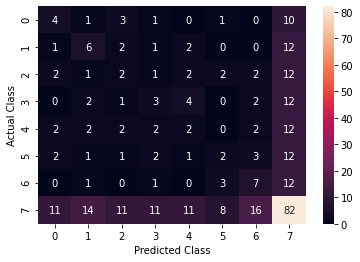

In [ ]:
# CNN Classifier from scratch
 
if type(train_set_f) is np.ndarray:
  train_set_f = torch.from_numpy(train_set_f).float()
  train_set_l = torch.from_numpy(train_set_l).long()
  validation_set_f = torch.from_numpy(validation_set_f).float()
  validation_set_l = torch.from_numpy(validation_set_l).long()
  test_set_f = torch.from_numpy(test_set_f).float()
  test_set_l = torch.from_numpy(test_set_l).long()
 
train_labels = train_set_l.numpy()
validation_labels = validation_set_l.numpy()
test_labels = test_set_l.numpy()
 
dev = torch.device("cuda:0")
no_epochs = -1
start_epoch = 100 
train_from_saved_model = True 
ckp_path = "scratch_classifier/model_1layer_{}.pth".format(start_epoch)
 
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 4, kernel_size=3, stride=1,padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(4, 16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
        )
 
        self.linear_layers = nn.Sequential(
            nn.Linear(16 * 55 * 55, 4000),
            nn.ReLU(),
            nn.Dropout(p=0.6),
            nn.Linear(4000,7)
        )
 
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0),-1)
        x = self.linear_layers(x)
        return x
 
model = Network().to(dev)
criterion = nn.CrossEntropyLoss().to(dev)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999))
 
def load_ckp(checkpoint_fpath, model, optimizer):
    checkpoint = torch.load(checkpoint_fpath)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    return model, optimizer, checkpoint['epoch']
 
if train_from_saved_model == True:
  model, optimizer, start_epoch = load_ckp(ckp_path, model, optimizer)


print(model)

# Testing
def testing(data_f,data_l):
  output = model(data_f)
  correct_1 = 0
  for i in range(len(data_f)):
    if torch.argmax(output[i]) == data_l[i]:
      correct_1 += 1
  return correct_1/len(data_l)
 
# Training
for e in range(no_epochs + 1):
    optimizer.zero_grad()
    outputs = model(train_set_f.to(dev))
    loss = criterion(outputs,torch.tensor(train_labels).to(dev))
    loss.backward()
    optimizer.step()
    if loss.item() <= 0.66:
      break
    print("Number of epochs : {} | Training Loss : {}".format(start_epoch + e,loss.item()))
    print(testing(train_set_f.to(dev),train_labels))
    print(testing(validation_set_f.to(dev),validation_labels))
    print(testing(test_set_f.to(dev),test_labels))  
 
# Saving model 
checkpoint = {
    'epoch': start_epoch + e,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict()
  }
 
# torch.save(checkpoint, "scratch_classifier/model_{}.pth".format(start_epoch + e))
calculate_confusion_matrix(model(test_set_f.to(dev)),test_set_l,"scratch_classifier/model_{}.png".format(start_epoch + e))

Network(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (oned_conv_layer): Conv2d(16, 4, kernel_size=(1, 1), stride=(1, 1))
  (softmax): Softmax(dim=1)
  (linear_layers): Sequential(
    (0): Linear(in_features=64, out_features=7, bias=True)
  )
)


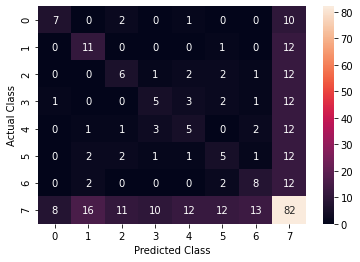

In [ ]:
# NetVLAD CNN Classifier 

if type(train_set_f) is np.ndarray:
  train_set_f = torch.from_numpy(train_set_f).float()
  train_set_l = torch.from_numpy(train_set_l).long()
  validation_set_f = torch.from_numpy(validation_set_f).float()
  validation_set_l = torch.from_numpy(validation_set_l).long()
  test_set_f = torch.from_numpy(test_set_f).float()
  test_set_l = torch.from_numpy(test_set_l).long()
 
train_labels = train_set_l.numpy()
validation_labels = validation_set_l.numpy()
test_labels = test_set_l.numpy()

no_epochs = -1
start_epoch = 205
train_from_saved_model = True 
ckp_path = "scratch_classifier/model_netVLAD_{}.pth".format(start_epoch)

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.num_clusters = 4
        self.ck = nn.Parameter(torch.rand(self.num_clusters, 16))
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
        )
        self.oned_conv_layer = nn.Conv2d(16,4,kernel_size=1,stride=1,padding=0)       
        self.softmax = nn.Softmax(dim=1)
        self.linear_layers = nn.Sequential(
            nn.Linear(64, 7)
        )
        
    def forward(self, x):
        x = self.cnn_layers(x)
        
        N, C = x.shape[:2]
        soft_assign = self.oned_conv_layer(x).view(N, self.num_clusters, -1)
        soft_assign = F.softmax(soft_assign, dim=1)
        x_flatten = x.view(N, C, -1)
        vlad = torch.zeros([N, self.num_clusters, C], dtype=x.dtype, layout=x.layout, device=x.device)
        for C in range(self.num_clusters): 
            residual = x_flatten.unsqueeze(0).permute(1, 0, 2, 3) - \
                    self.ck[C:C+1, :].expand(x_flatten.size(-1), -1, -1).permute(1, 2, 0).unsqueeze(0)
            residual *= soft_assign[:,C:C+1,:].unsqueeze(2)
            vlad[:,C:C+1,:] = residual.sum(dim=-1)
        vlad = F.normalize(vlad, p=2, dim=2)  
        vlad = vlad.view(x.size(0), -1)  
        vlad = F.normalize(vlad, p=2, dim=1)
        
        x = self.linear_layers(vlad)
        return x

model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, betas=(0.9, 0.999))

def load_ckp(checkpoint_fpath, model, optimizer):
    checkpoint = torch.load(checkpoint_fpath)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    return model, optimizer, checkpoint['epoch']

if train_from_saved_model == True:
  model, optimizer, start_epoch = load_ckp(ckp_path, model, optimizer)

print(model)

# Testing
def testing(data_f,data_l):
  output = model(data_f)
  correct_1 = 0
  for i in range(len(data_f)):
    if torch.argmax(output[i]) == data_l[i]:
      correct_1 += 1
  print(correct_1/len(data_l))
  

# Training
for e in range(no_epochs + 1):
    optimizer.zero_grad()
    outputs = model(train_set_f)
    loss = criterion(outputs,torch.tensor(train_labels))
    loss.backward()
    optimizer.step()
    print("Number of epochs : {} | Training Loss : {}".format(start_epoch + e,loss.item()))
    
    testing(train_set_f,train_labels)
    testing(validation_set_f,validation_labels)
    testing(test_set_f,test_labels)

# Saving model 
checkpoint = {
    'epoch': start_epoch + e,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict()
  }

# torch.save(checkpoint, "scratch_classifier/model_netVLAD_{}.pth".format(205))
calculate_confusion_matrix(model(test_set_f),test_set_l,ckp_path)
 
